In [43]:
import numpy as np
import h5py
from uatu.watchers import key_func

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [45]:
fname = '/home/sean/Git/uatu/data/UatuLightconePreds.hdf5'
#fname = '/scratch/users/swmclau2/UatuLightconeTest/UatuLightconePreds.hdf5'

In [46]:
f = h5py.File(fname, 'r')

In [47]:
len(f.keys())

50

In [48]:
cosmo_preds = np.zeros((len(f.keys()), 4))
cosmo_true = np.zeros((len(f.keys()), 2))

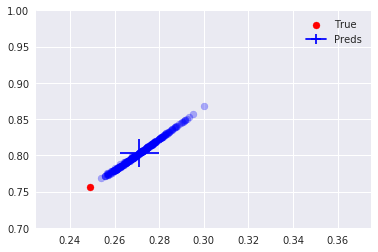

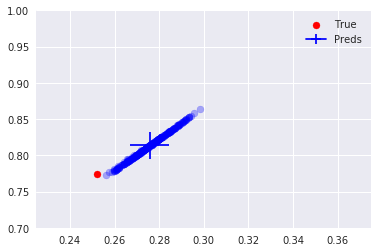

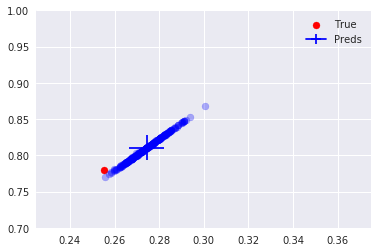

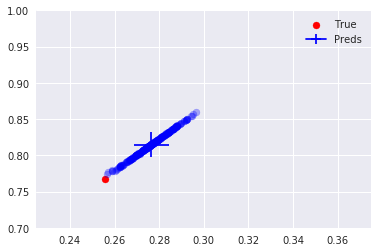

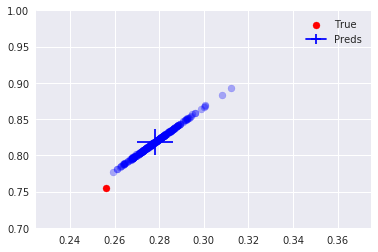

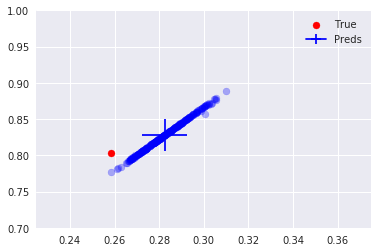

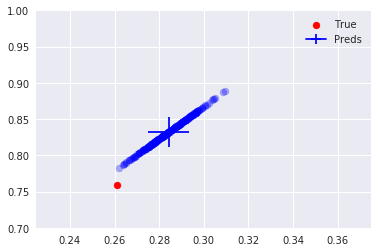

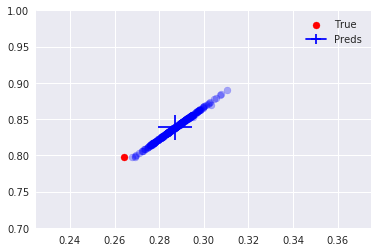

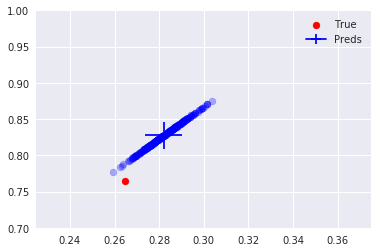

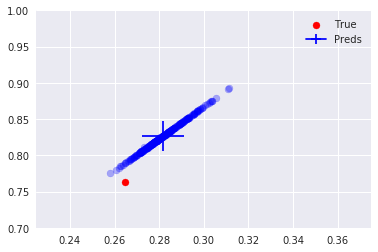

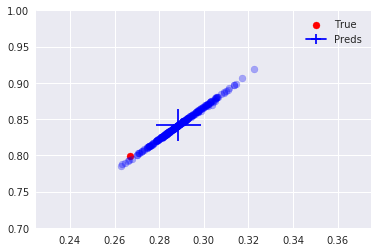

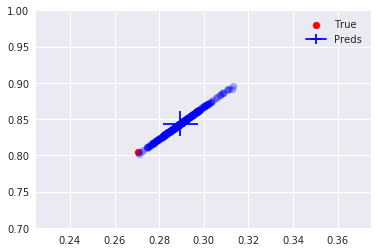

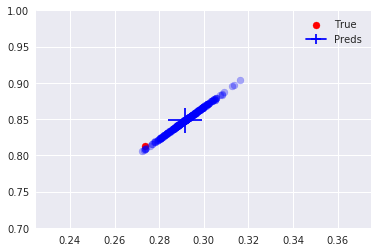

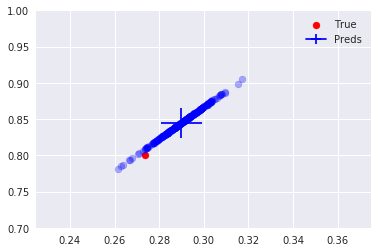

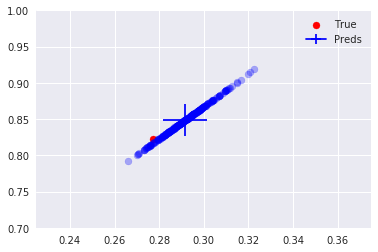

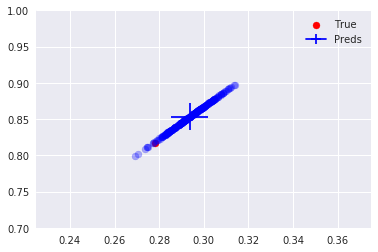

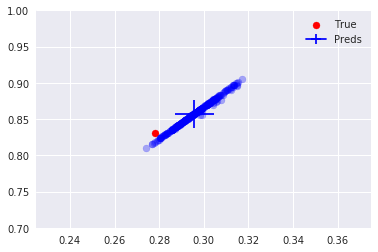

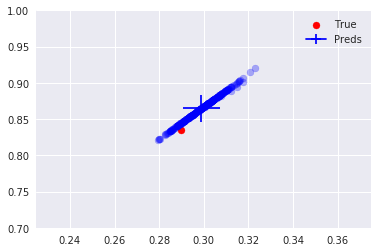

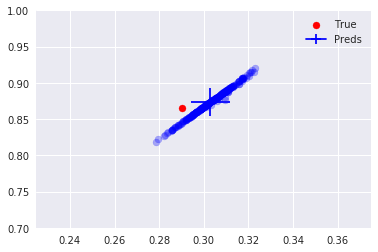

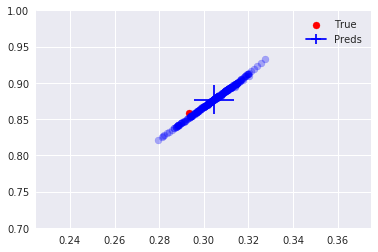

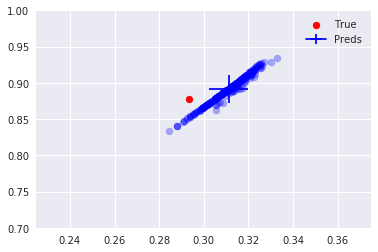

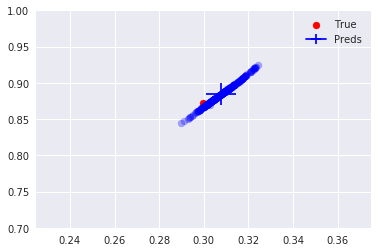

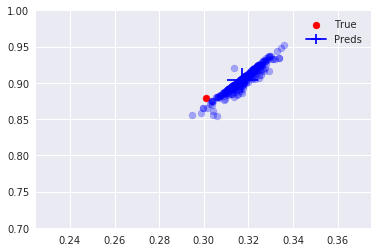

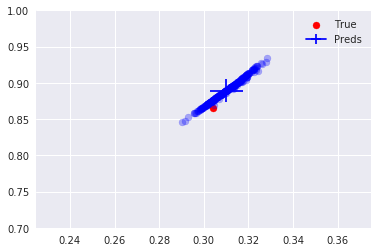

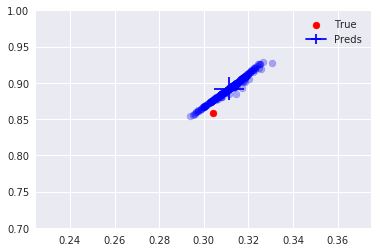

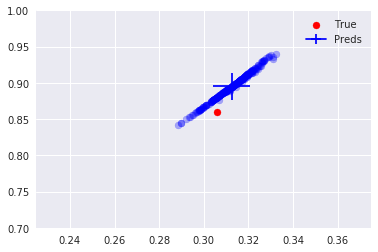

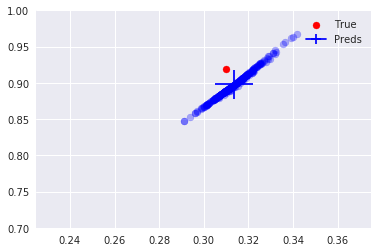

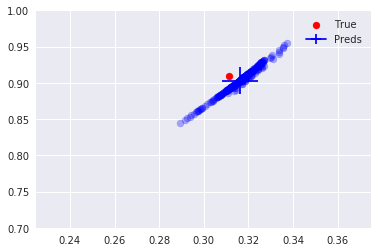

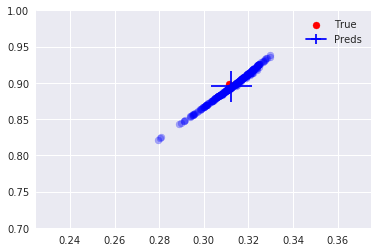

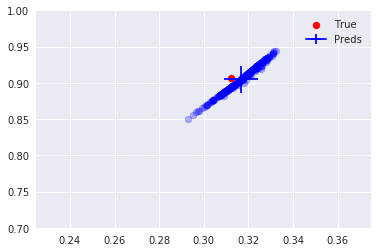

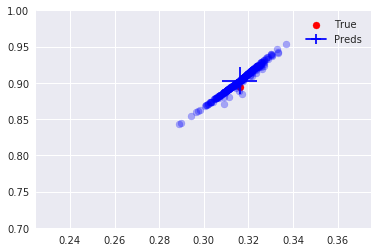

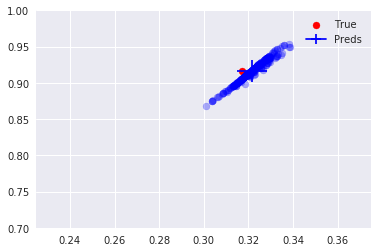

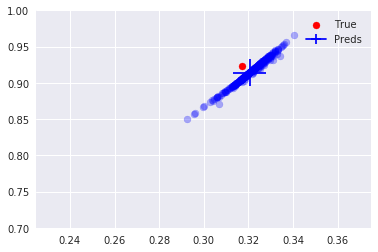

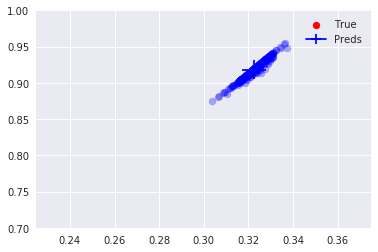

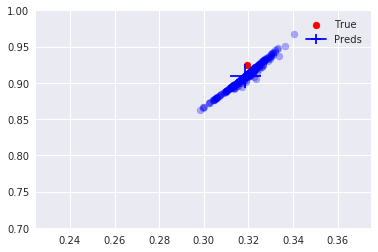

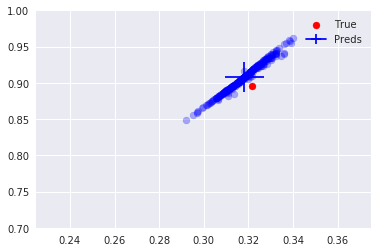

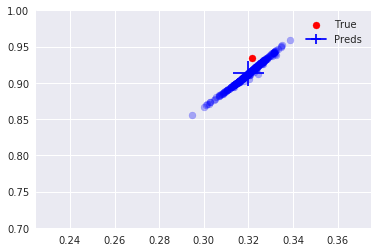

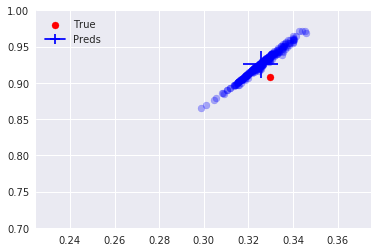

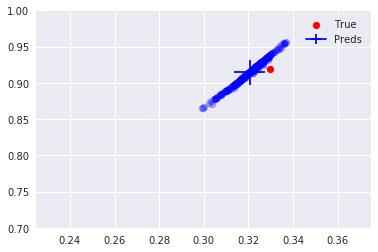

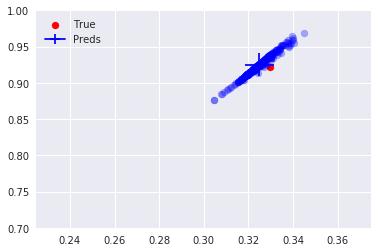

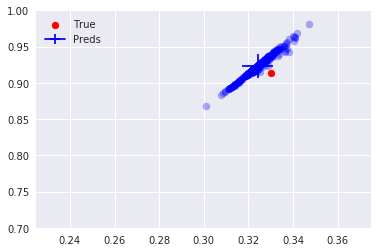

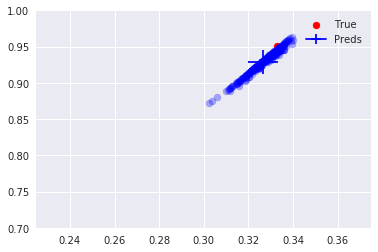

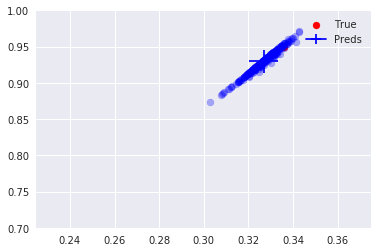

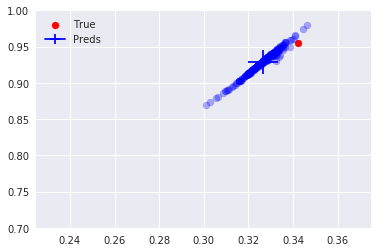

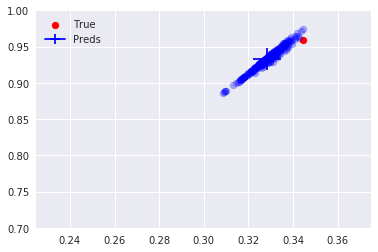

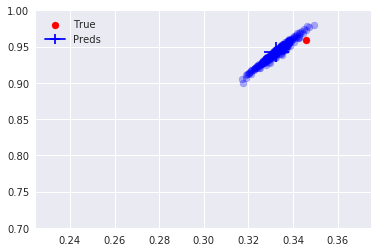

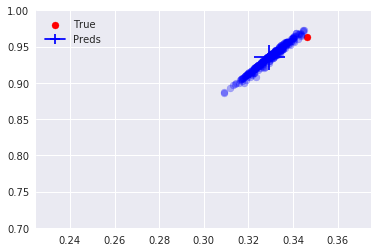

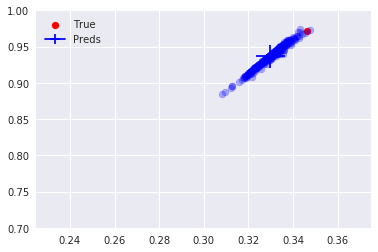

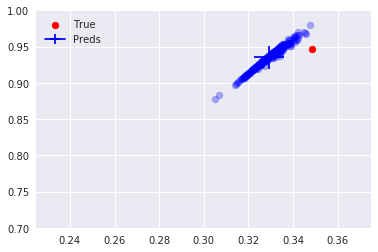

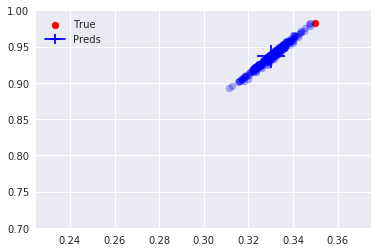

In [49]:
for cosmo_idx, true_val in enumerate(f.keys()):
    tvs = true_val.split('_')
    
    true_vals = np.array((float(tvs[1]), float(tvs[3]) )).reshape((1,2))
    preds = np.zeros((289, 2))
    #continue
    #print true_val
    for idx, map in enumerate(f[key_func(true_vals)]):
        #print f[key_func(true_vals)][map].value.shape
        preds[idx,:] =  f[key_func(true_vals)][map].value
        #pass
        if idx == 0:
            cosmo_true[cosmo_idx] = true_vals[0, :]
            plt.scatter(true_vals[0,0], true_vals[0,1], color = 'r', label = 'True')
    #print preds.mean(axis = 0)
    plt.scatter(preds[:,0], preds[:,1], color = 'b', alpha = 0.3)

    plt.errorbar(preds[:,0].mean(), preds[:,1].mean(), yerr = preds[:,1].std(), xerr=preds[:,0].std(), color = 'b', label = 'Preds')
    
    cosmo_preds[cosmo_idx, :2] = preds.mean(axis = 0)
    cosmo_preds[cosmo_idx,2:] = preds.std(axis =0)
    
    plt.legend(loc='best')
    plt.xlim([0.225, 0.375])
    plt.ylim([0.7, 1.0])
    plt.show()

In [50]:
f.close()

In [51]:
fname = '/home/sean/Git/uatu/data/snd_attacked.samples.hdf5'
#fname = '/scratch/users/swmclau2/UatuLightconeTest/UatuLightconePreds.hdf5'

In [52]:
f = h5py.File(fname, 'r')

In [53]:
len(f.keys())

25

In [54]:
cosmo_preds_attacked = np.zeros((len(f.keys()), 4))
cosmo_true_attacked = np.zeros((len(f.keys()), 2))

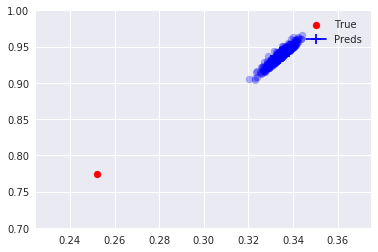

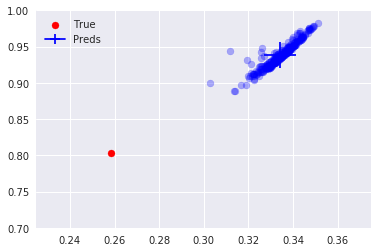

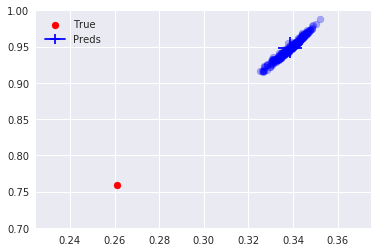

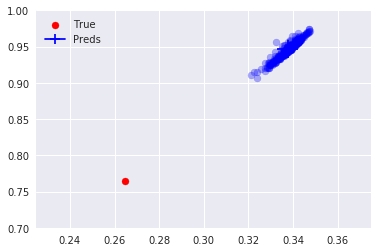

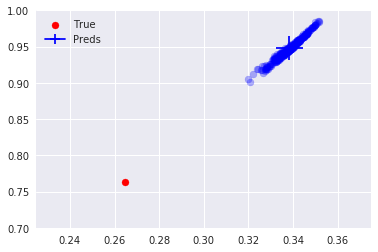

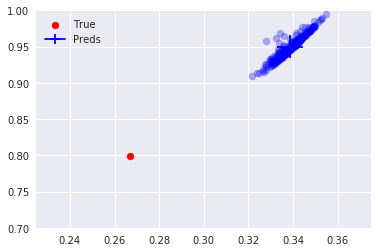

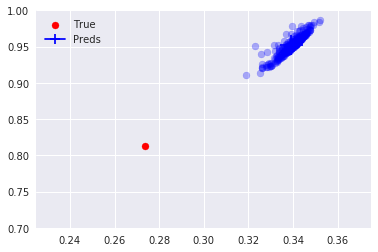

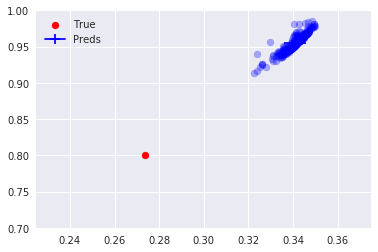

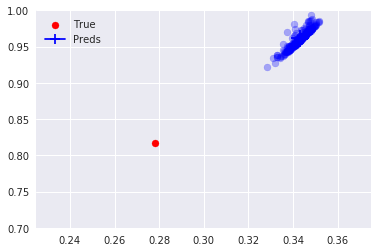

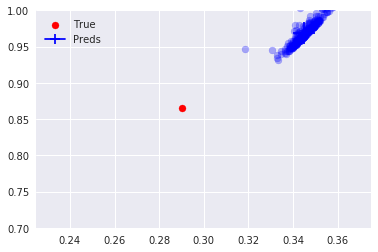

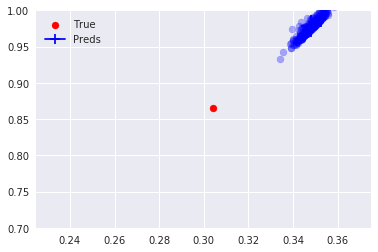

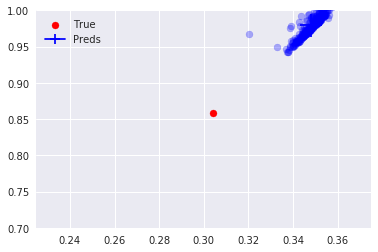

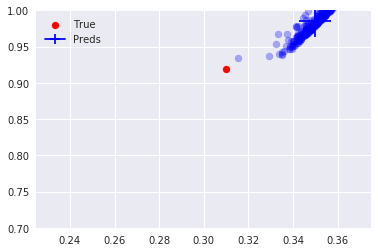

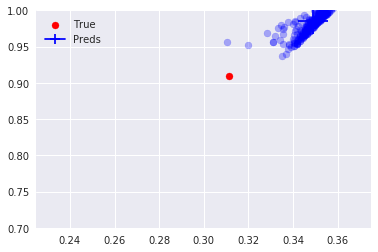

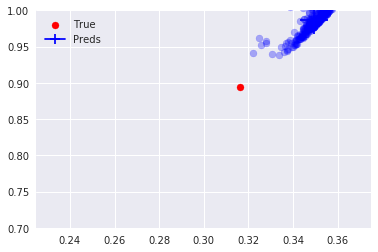

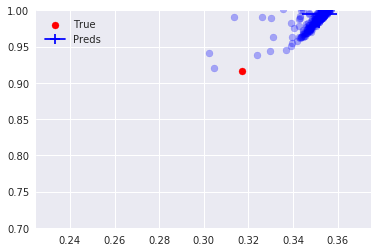

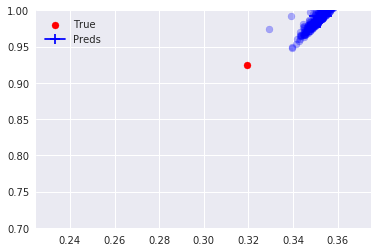

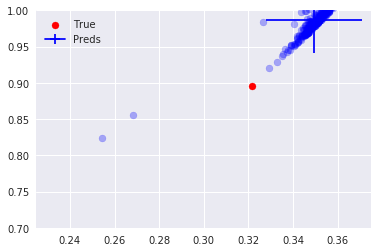

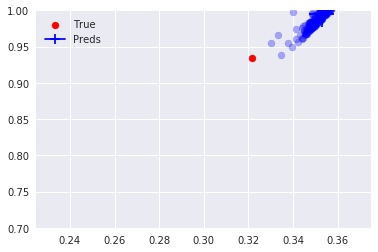

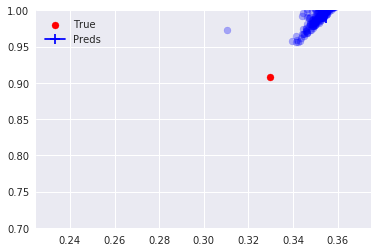

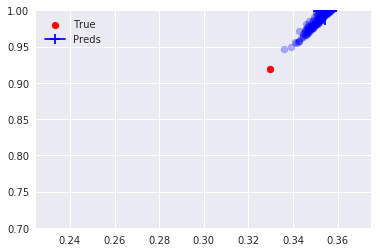

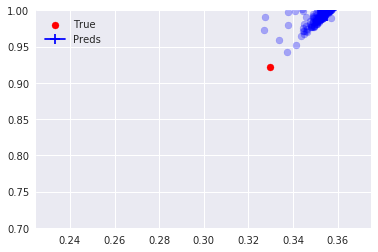

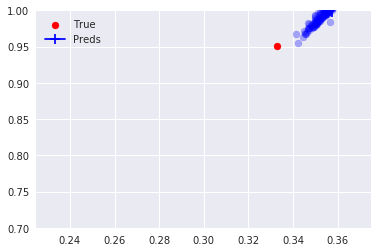

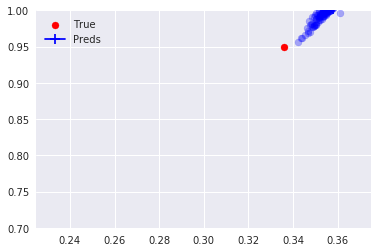

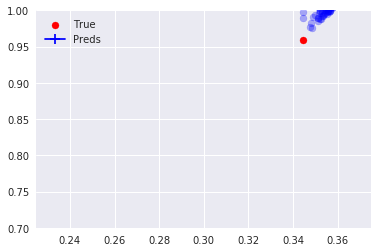

In [55]:
for cosmo_idx, true_val in enumerate(f.keys()):
    tvs = true_val.split('_')
    
    true_vals = np.array((float(tvs[1]), float(tvs[3]) )).reshape((1,2))
    preds = np.zeros((289, 2))
    #continue
    #print true_val
    for idx, map in enumerate(f[key_func(true_vals)]):
        #print f[key_func(true_vals)][map].value.shape
        preds[idx,:] =  f[key_func(true_vals)][map].value
        #pass
        if idx == 0:
            cosmo_true[cosmo_idx] = true_vals[0, :]
            plt.scatter(true_vals[0,0], true_vals[0,1], color = 'r', label = 'True')
    #print preds.mean(axis = 0)
    plt.scatter(preds[:,0], preds[:,1], color = 'b', alpha = 0.3)

    plt.errorbar(preds[:,0].mean(), preds[:,1].mean(), yerr = preds[:,1].std(), xerr=preds[:,0].std(), color = 'b', label = 'Preds')
    
    cosmo_preds_attacked[cosmo_idx, :2] = preds.mean(axis = 0)
    cosmo_preds_attacked[cosmo_idx,2:] = preds.std(axis =0)
    
    plt.legend(loc='best')
    plt.xlim([0.225, 0.375])
    plt.ylim([0.7, 1.0])
    plt.show()

In [56]:
cosmo_preds_attacked[:,0]

array([0.33403804, 0.3340661 , 0.33876099, 0.33763692, 0.33833665,
       0.33878109, 0.33921169, 0.34077971, 0.34307215, 0.3449906 ,
       0.34821503, 0.3481361 , 0.34977262, 0.34887665, 0.34937073,
       0.3517258 , 0.35222302, 0.3494694 , 0.35276159, 0.35474278,
       0.35438312, 0.35507852, 0.35745031, 0.35807331, 0.20431972])

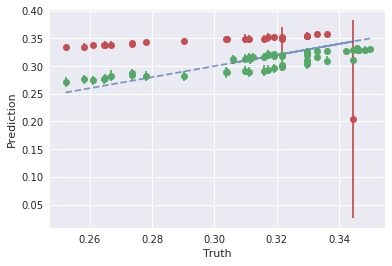

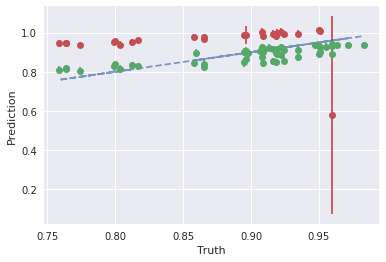

In [58]:
for i in xrange(2):
    plt.plot(cosmo_true[:,i], cosmo_true[:,i], ls = '--', alpha = 0.7)
    plt.errorbar(cosmo_true[:, i], cosmo_preds[:,i], yerr = cosmo_preds[:,i+2], fmt = 'o', label = 'Normal')
    plt.errorbar(cosmo_true[:len(cosmo_preds_attacked), i], cosmo_preds_attacked[:,i], yerr = cosmo_preds_attacked[:,i+2], fmt = 'o', label = 'Attacked')

    plt.ylabel('Prediction')
    plt.xlabel('Truth')
    plt.legend(loc = 'best')
    plt.show()